# Processamento de Dados Geográficos

Este notebook apresenta conceitos básicos de processamento de dados geográficos como criação de geometria a partir de listas de coordenadas, conversão de sistemas de coordenadas e junção espacial.

O objetivo do exemplo usado é calcular a densidade de unidades de saúde nas regionais de Curitiba.

In [1]:
# Importação das bibliotecas
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

## Leitura e conversão dos dados

Primeiramente lemos e exibimos os dados dos mapas das regionais a partir de um shapefile.

In [2]:
gdf_regionais = gpd.read_file('DIVISA_DE_REGIONAIS')

gdf_regionais.head()

,OBJECTID,CODIGO,TIPO,NOME,NOME_LEG,COD_LEG,FONTE,SHAPE_AREA,SHAPE_LEN,geometry
0,11,10.0,DIVISA DE REGIONAL,BAIRRO NOVO,Administração Regional do Bairro Novo,R.10.BN,Decreto Municipal 844 / 2018,4.500833e+07,39237.763601,"POLYGON ((674417.040 7175661.200, 674444.600 7..."
1,12,4.0,DIVISA DE REGIONAL,BOA VISTA,Administração Regional da Boa Vista,R.4.BV,Decreto Municipal 844 / 2018,5.834114e+07,48122.001004,"POLYGON ((674046.850 7195540.500, 674059.660 7..."
2,13,2.0,DIVISA DE REGIONAL,BOQUEIRÃO,Administração Regional do Boqueirão,R.2.BQ,Decreto Municipal 844 / 2018,3.980664e+07,35530.482866,"POLYGON ((679155.304 7178062.629, 679160.004 7..."
3,14,3.0,DIVISA DE REGIONAL,CAJURU,Administração Regional do Cajuru,R.3.CJ,Decreto Municipal 844 / 2018,3.993461e+07,34461.658413,"POLYGON ((679317.800 7187684.230, 679330.250 7..."
4,15,11.0,DIVISA DE REGIONAL,CIC,Administração Regional da CIC,R.11.CIC,Decreto Municipal 844 / 2018,6.345939e+07,60563.095510,"POLYGON ((663260.181 7186369.051, 663286.301 7..."


A plotagem do mapa é baseada na coluna `geometry` do dataframe. Esta coluna contém os desenhos das formas presentes no mapa, que podem ser pontos, linhas ou polígonos (como no exemplo).

<AxesSubplot:>

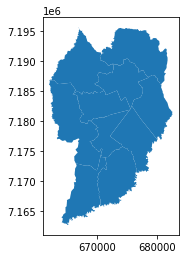

In [3]:
gdf_regionais.plot()

Os dados das unidades de saúde estão em um CSV que contém as coordenadas (latitude, longitude) de cada unidade.

In [4]:
df_unidades = pd.read_csv('unidades-saude.csv')
df_unidades.head()

,categoria,nome,latitude,longitude,elevacao,endereco,bairro,distrito
0,Unidade Saude Basica,US Bairro Novo,-25.547228,-49.263454,903.00,Rua Paulo Rio Branco de Macedo 793,Sitio Cercado,Bairro Novo
1,Unidade Saude Basica,Us Coqueiros,-25.534679,-49.265069,891.15,Rua Coronel Victor Agner Kendrick 80,Sitio Cercado,Bairro Novo
2,Unidade Saude Basica,Us João Cândido,-25.541119,-49.258764,889.21,Rua Ourizona 2229,Bairro novo,Bairro Novo
3,Unidade Saude Basica,Us Nossa senhora Aparecida,-25.544969,-49.252270,882.00,Rua Carlos Amoretty Osório 136,Sitio Cercado,Bairro Novo
4,Unidade Saude Basica,US Osternack,-25.551319,-49.247345,884.76,Rua Miguel Rossetim 100 Vila Osternack,Vila Osternack,Bairro Novo


Para podemos plotar e processar os dados das unidades, precisamos criar a coluna de geometria a adicioná-la a um dataframe do geopandas. Este procedimento é feito abaixo:

In [5]:
# criando os pontos da geometria 
geometry = [Point(xy) for xy in zip(df_unidades['longitude'], df_unidades['latitude'])]


gdf_unidades = gpd.GeoDataFrame(df_unidades, crs='epsg:4326', geometry=geometry)
gdf_unidades.head()

,categoria,nome,latitude,longitude,elevacao,endereco,bairro,distrito,geometry
0,Unidade Saude Basica,US Bairro Novo,-25.547228,-49.263454,903.00,Rua Paulo Rio Branco de Macedo 793,Sitio Cercado,Bairro Novo,POINT (-49.26345 -25.54723)
1,Unidade Saude Basica,Us Coqueiros,-25.534679,-49.265069,891.15,Rua Coronel Victor Agner Kendrick 80,Sitio Cercado,Bairro Novo,POINT (-49.26507 -25.53468)
2,Unidade Saude Basica,Us João Cândido,-25.541119,-49.258764,889.21,Rua Ourizona 2229,Bairro novo,Bairro Novo,POINT (-49.25876 -25.54112)
3,Unidade Saude Basica,Us Nossa senhora Aparecida,-25.544969,-49.252270,882.00,Rua Carlos Amoretty Osório 136,Sitio Cercado,Bairro Novo,POINT (-49.25227 -25.54497)
4,Unidade Saude Basica,US Osternack,-25.551319,-49.247345,884.76,Rua Miguel Rossetim 100 Vila Osternack,Vila Osternack,Bairro Novo,POINT (-49.24735 -25.55132)


## Sistema de Coordenadas e plotagem de múltiplos mapas

Coordinate Reference Systems (CRS) são padrões de representação de informação necessárias para a plotagem adequada de mapas. Um CRS contém informação sobre o Datum (formato e posicionamento da Terra) e a projeção (operação matemática para transformar a representação 2D do mapa).

No exemplo acima, o código do CRS usado é o EPSG:4326, também conhecido como WGS 84. Este é um padrão comum, pois representa uma projeção simples do globo usando latitude e logitude como coordenadas do mapa 2D. Esta projeção destorce as formas mais ao norte e ao sul do globo (veja o mapa mundi criado no notebook de visualização).

Outros padrões e projeções podem ser usados para evitar distorções nas áreas em análise. Por isso é importante saber o CRS de todos os mapas em uso e convertê-los se necessário. Abaixo plotamos os dados das unidades de saúde, que foram representados no CRS EPSG:4326.


<AxesSubplot:>

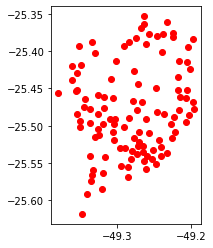

In [6]:
gdf_unidades.plot(color = 'r')

Vamos agora plotar os dois mapas (das regionais e das unidades). Como o geopandas é baseado no Matplotlib, podemos fazer plotagens múltiplas compartilhando o mesmo eixo como no exemplo abaixo. O mapa, porém, ficou sem sentido. Isto acontece sempre que os CRSs dos mapas usados não são os mesmos.

<AxesSubplot:>

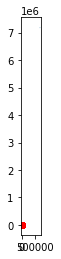

In [7]:
ax = gdf_regionais.plot()
gdf_unidades.plot(ax = ax, color = 'r')

Precisamos, portanto, analisar o CRS das regionais e converter caso necessário:

In [8]:
gdf_regionais.crs

<Projected CRS: EPSG:29192>
Name: SAD69 / UTM zone 22S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: South America - 54°W to 48°W, S hemisphere and SAD69 by country
- bounds: (-54.0, -35.71, -47.99, 7.04)
Coordinate Operation:
- name: UTM zone 22S
- method: Transverse Mercator
Datum: South American Datum 1969
- Ellipsoid: GRS 1967 Modified
- Prime Meridian: Greenwich

Como o mapa usa um CRS diferente, precisamos converter antes de plotar:

<AxesSubplot:>

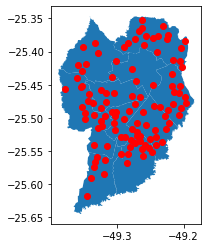

In [9]:
gdf_regionais.to_crs(epsg=4326, inplace=True)

ax = gdf_regionais.plot()
gdf_unidades.plot(ax = ax, color = 'r')

## Junção espacial

Para calcular a densidade de unidades em cada regional, precisamos saber o número de unidades em cada regional. Portanto, precisamos contar todos os pontos dentro das fronteiras de cada reginal. Este tipo de procedimento é conhecido como junção espacial, pois é baseado na mesma ideia das junções dos bancos de dados relacionais.

Abaixo fazemos a junção. Em vez de especificar atributos para determinar quando uma linha de um detaframe deve casar com uma do outro, usamos uma operação espacial. No caso, usamos a operação `intersects` que fará o casamento sempre que uma geometria interceptar a outra. Outras opções de operações são ‘contains’ e ‘within’.

In [10]:
joined_df = gpd.sjoin(
    gdf_regionais,
    gdf_unidades,
    how='inner',
    op='contains',
)

joined_df.head()

,OBJECTID,CODIGO,TIPO,NOME,NOME_LEG,COD_LEG,FONTE,SHAPE_AREA,SHAPE_LEN,geometry,index_right,categoria,nome,latitude,longitude,elevacao,endereco,bairro,distrito
0,11,10.0,DIVISA DE REGIONAL,BAIRRO NOVO,Administração Regional do Bairro Novo,R.10.BN,Decreto Municipal 844 / 2018,45008333.42,39237.763601,"POLYGON ((-49.26474 -25.52647, -49.26446 -25.5...",10,Unidade Saude Basica,US Umbará II,-25.568193,-49.284897,921.75,Rua Nicola Pelanda 4800,Umbará,Bairro Novo
0,11,10.0,DIVISA DE REGIONAL,BAIRRO NOVO,Administração Regional do Bairro Novo,R.10.BN,Decreto Municipal 844 / 2018,45008333.42,39237.763601,"POLYGON ((-49.26474 -25.52647, -49.26446 -25.5...",7,Unidade Saude Basica,US Sambaqui,-25.557874,-49.261174,907.99,Rua Roberto Dala Barba 44,Sitio Cercado,Bairro Novo
0,11,10.0,DIVISA DE REGIONAL,BAIRRO NOVO,Administração Regional do Bairro Novo,R.10.BN,Decreto Municipal 844 / 2018,45008333.42,39237.763601,"POLYGON ((-49.26474 -25.52647, -49.26446 -25.5...",9,Unidade Saude Basica,US Umbará,-25.554996,-49.284334,900.17,Rua Dep. Pinheiro Junior 915,Umbará,Bairro Novo
0,11,10.0,DIVISA DE REGIONAL,BAIRRO NOVO,Administração Regional do Bairro Novo,R.10.BN,Decreto Municipal 844 / 2018,45008333.42,39237.763601,"POLYGON ((-49.26474 -25.52647, -49.26446 -25.5...",4,Unidade Saude Basica,US Osternack,-25.551319,-49.247345,884.76,Rua Miguel Rossetim 100 Vila Osternack,Vila Osternack,Bairro Novo
0,11,10.0,DIVISA DE REGIONAL,BAIRRO NOVO,Administração Regional do Bairro Novo,R.10.BN,Decreto Municipal 844 / 2018,45008333.42,39237.763601,"POLYGON ((-49.26474 -25.52647, -49.26446 -25.5...",0,Unidade Saude Basica,US Bairro Novo,-25.547228,-49.263454,903.00,Rua Paulo Rio Branco de Macedo 793,Sitio Cercado,Bairro Novo


Com as linhas do dataframe casadas, podemos agora agregar para contar o total de unidades em cada regional:

In [11]:
df_total = joined_df.groupby('NOME').size().rename('unidades').to_frame().reset_index()

df_total

,NOME,unidades
0,BAIRRO NOVO,12
1,BOA VISTA,19
2,BOQUEIRÃO,14
3,CAJURU,12
4,CIC,17
5,MATRIZ,3
6,PINHEIRINHO,11
7,PORTÃO,7
8,SANTA FELICIDADE,8
9,TATUQUARA,8


Por fim adicionamos a contagem no dataframe original, calculamos a densidade e exibimos um mapa coroplético.

In [12]:
gdf_regionais = gdf_regionais.merge(df_total)

gdf_regionais.head()

,OBJECTID,CODIGO,TIPO,NOME,NOME_LEG,COD_LEG,FONTE,SHAPE_AREA,SHAPE_LEN,geometry,unidades
0,11,10.0,DIVISA DE REGIONAL,BAIRRO NOVO,Administração Regional do Bairro Novo,R.10.BN,Decreto Municipal 844 / 2018,4.500833e+07,39237.763601,"POLYGON ((-49.26474 -25.52647, -49.26446 -25.5...",12
1,12,4.0,DIVISA DE REGIONAL,BOA VISTA,Administração Regional da Boa Vista,R.4.BV,Decreto Municipal 844 / 2018,5.834114e+07,48122.001004,"POLYGON ((-49.27099 -25.34707, -49.27086 -25.3...",19
2,13,2.0,DIVISA DE REGIONAL,BOQUEIRÃO,Administração Regional do Boqueirão,R.2.BQ,Decreto Municipal 844 / 2018,3.980664e+07,35530.482866,"POLYGON ((-49.21792 -25.50423, -49.21788 -25.5...",14
3,14,3.0,DIVISA DE REGIONAL,CAJURU,Administração Regional do Cajuru,R.3.CJ,Decreto Municipal 844 / 2018,3.993461e+07,34461.658413,"POLYGON ((-49.21759 -25.41736, -49.21746 -25.4...",12
4,15,11.0,DIVISA DE REGIONAL,CIC,Administração Regional da CIC,R.11.CIC,Decreto Municipal 844 / 2018,6.345939e+07,60563.095510,"POLYGON ((-49.37703 -25.43108, -49.37677 -25.4...",17


In [13]:
gdf_regionais['densidade'] = gdf_regionais['unidades']/gdf_regionais['SHAPE_AREA']

gdf_regionais.head()

,OBJECTID,CODIGO,TIPO,NOME,NOME_LEG,COD_LEG,FONTE,SHAPE_AREA,SHAPE_LEN,geometry,unidades,densidade
0,11,10.0,DIVISA DE REGIONAL,BAIRRO NOVO,Administração Regional do Bairro Novo,R.10.BN,Decreto Municipal 844 / 2018,4.500833e+07,39237.763601,"POLYGON ((-49.26474 -25.52647, -49.26446 -25.5...",12,2.666173e-07
1,12,4.0,DIVISA DE REGIONAL,BOA VISTA,Administração Regional da Boa Vista,R.4.BV,Decreto Municipal 844 / 2018,5.834114e+07,48122.001004,"POLYGON ((-49.27099 -25.34707, -49.27086 -25.3...",19,3.256707e-07
2,13,2.0,DIVISA DE REGIONAL,BOQUEIRÃO,Administração Regional do Boqueirão,R.2.BQ,Decreto Municipal 844 / 2018,3.980664e+07,35530.482866,"POLYGON ((-49.21792 -25.50423, -49.21788 -25.5...",14,3.517002e-07
3,14,3.0,DIVISA DE REGIONAL,CAJURU,Administração Regional do Cajuru,R.3.CJ,Decreto Municipal 844 / 2018,3.993461e+07,34461.658413,"POLYGON ((-49.21759 -25.41736, -49.21746 -25.4...",12,3.004912e-07
4,15,11.0,DIVISA DE REGIONAL,CIC,Administração Regional da CIC,R.11.CIC,Decreto Municipal 844 / 2018,6.345939e+07,60563.095510,"POLYGON ((-49.37703 -25.43108, -49.37677 -25.4...",17,2.678878e-07


<AxesSubplot:>

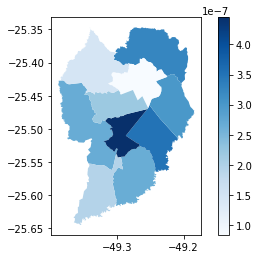

In [14]:
gdf_regionais.plot(column='densidade', legend=True, cmap='Blues')